# Housing Prices Prediction

In [1]:
# importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Reading train and test dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [3]:
# Combining train and test dataset

df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [5]:
# Checking the shape of the dataset
df.shape

(2919, 81)

In [6]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [7]:
# Summerizing the numerical columns

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
# Checking for null values

for col in df.columns:
    n = df[col].isna().sum() / len(df[col].values)
    print(f"{col} null : {n.round(3)}")

Id null : 0.0
MSSubClass null : 0.0
MSZoning null : 0.001
LotFrontage null : 0.166
LotArea null : 0.0
Street null : 0.0
Alley null : 0.932
LotShape null : 0.0
LandContour null : 0.0
Utilities null : 0.001
LotConfig null : 0.0
LandSlope null : 0.0
Neighborhood null : 0.0
Condition1 null : 0.0
Condition2 null : 0.0
BldgType null : 0.0
HouseStyle null : 0.0
OverallQual null : 0.0
OverallCond null : 0.0
YearBuilt null : 0.0
YearRemodAdd null : 0.0
RoofStyle null : 0.0
RoofMatl null : 0.0
Exterior1st null : 0.0
Exterior2nd null : 0.0
MasVnrType null : 0.605
MasVnrArea null : 0.008
ExterQual null : 0.0
ExterCond null : 0.0
Foundation null : 0.0
BsmtQual null : 0.028
BsmtCond null : 0.028
BsmtExposure null : 0.028
BsmtFinType1 null : 0.027
BsmtFinSF1 null : 0.0
BsmtFinType2 null : 0.027
BsmtFinSF2 null : 0.0
BsmtUnfSF null : 0.0
TotalBsmtSF null : 0.0
Heating null : 0.0
HeatingQC null : 0.0
CentralAir null : 0.0
Electrical null : 0.0
1stFlrSF null : 0.0
2ndFlrSF null : 0.0
LowQualFinSF null :

In [9]:
# Checking for duplicate entries

df.duplicated().sum()

0

In [10]:
# Checking unique values

for col in df.columns:
    if df[col].dtype == object:
        n = df[col].unique()
        print(f"Categories in {col} variable : {n}\n")

Categories in MSZoning variable : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

Categories in Street variable : ['Pave' 'Grvl']

Categories in Alley variable : [nan 'Grvl' 'Pave']

Categories in LotShape variable : ['Reg' 'IR1' 'IR2' 'IR3']

Categories in LandContour variable : ['Lvl' 'Bnk' 'Low' 'HLS']

Categories in Utilities variable : ['AllPub' 'NoSeWa' nan]

Categories in LotConfig variable : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Categories in LandSlope variable : ['Gtl' 'Mod' 'Sev']

Categories in Neighborhood variable : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Categories in Condition1 variable : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Categories in Condition2 variable : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Categories in BldgTyp

In [11]:
# Checking for numerical columns

for col in df.columns:
    n = df[col].dtype !='O'
    print(f"Numerical Columns :{col}")

Numerical Columns :Id
Numerical Columns :MSSubClass
Numerical Columns :MSZoning
Numerical Columns :LotFrontage
Numerical Columns :LotArea
Numerical Columns :Street
Numerical Columns :Alley
Numerical Columns :LotShape
Numerical Columns :LandContour
Numerical Columns :Utilities
Numerical Columns :LotConfig
Numerical Columns :LandSlope
Numerical Columns :Neighborhood
Numerical Columns :Condition1
Numerical Columns :Condition2
Numerical Columns :BldgType
Numerical Columns :HouseStyle
Numerical Columns :OverallQual
Numerical Columns :OverallCond
Numerical Columns :YearBuilt
Numerical Columns :YearRemodAdd
Numerical Columns :RoofStyle
Numerical Columns :RoofMatl
Numerical Columns :Exterior1st
Numerical Columns :Exterior2nd
Numerical Columns :MasVnrType
Numerical Columns :MasVnrArea
Numerical Columns :ExterQual
Numerical Columns :ExterCond
Numerical Columns :Foundation
Numerical Columns :BsmtQual
Numerical Columns :BsmtCond
Numerical Columns :BsmtExposure
Numerical Columns :BsmtFinType1
Numer

<Axes: >

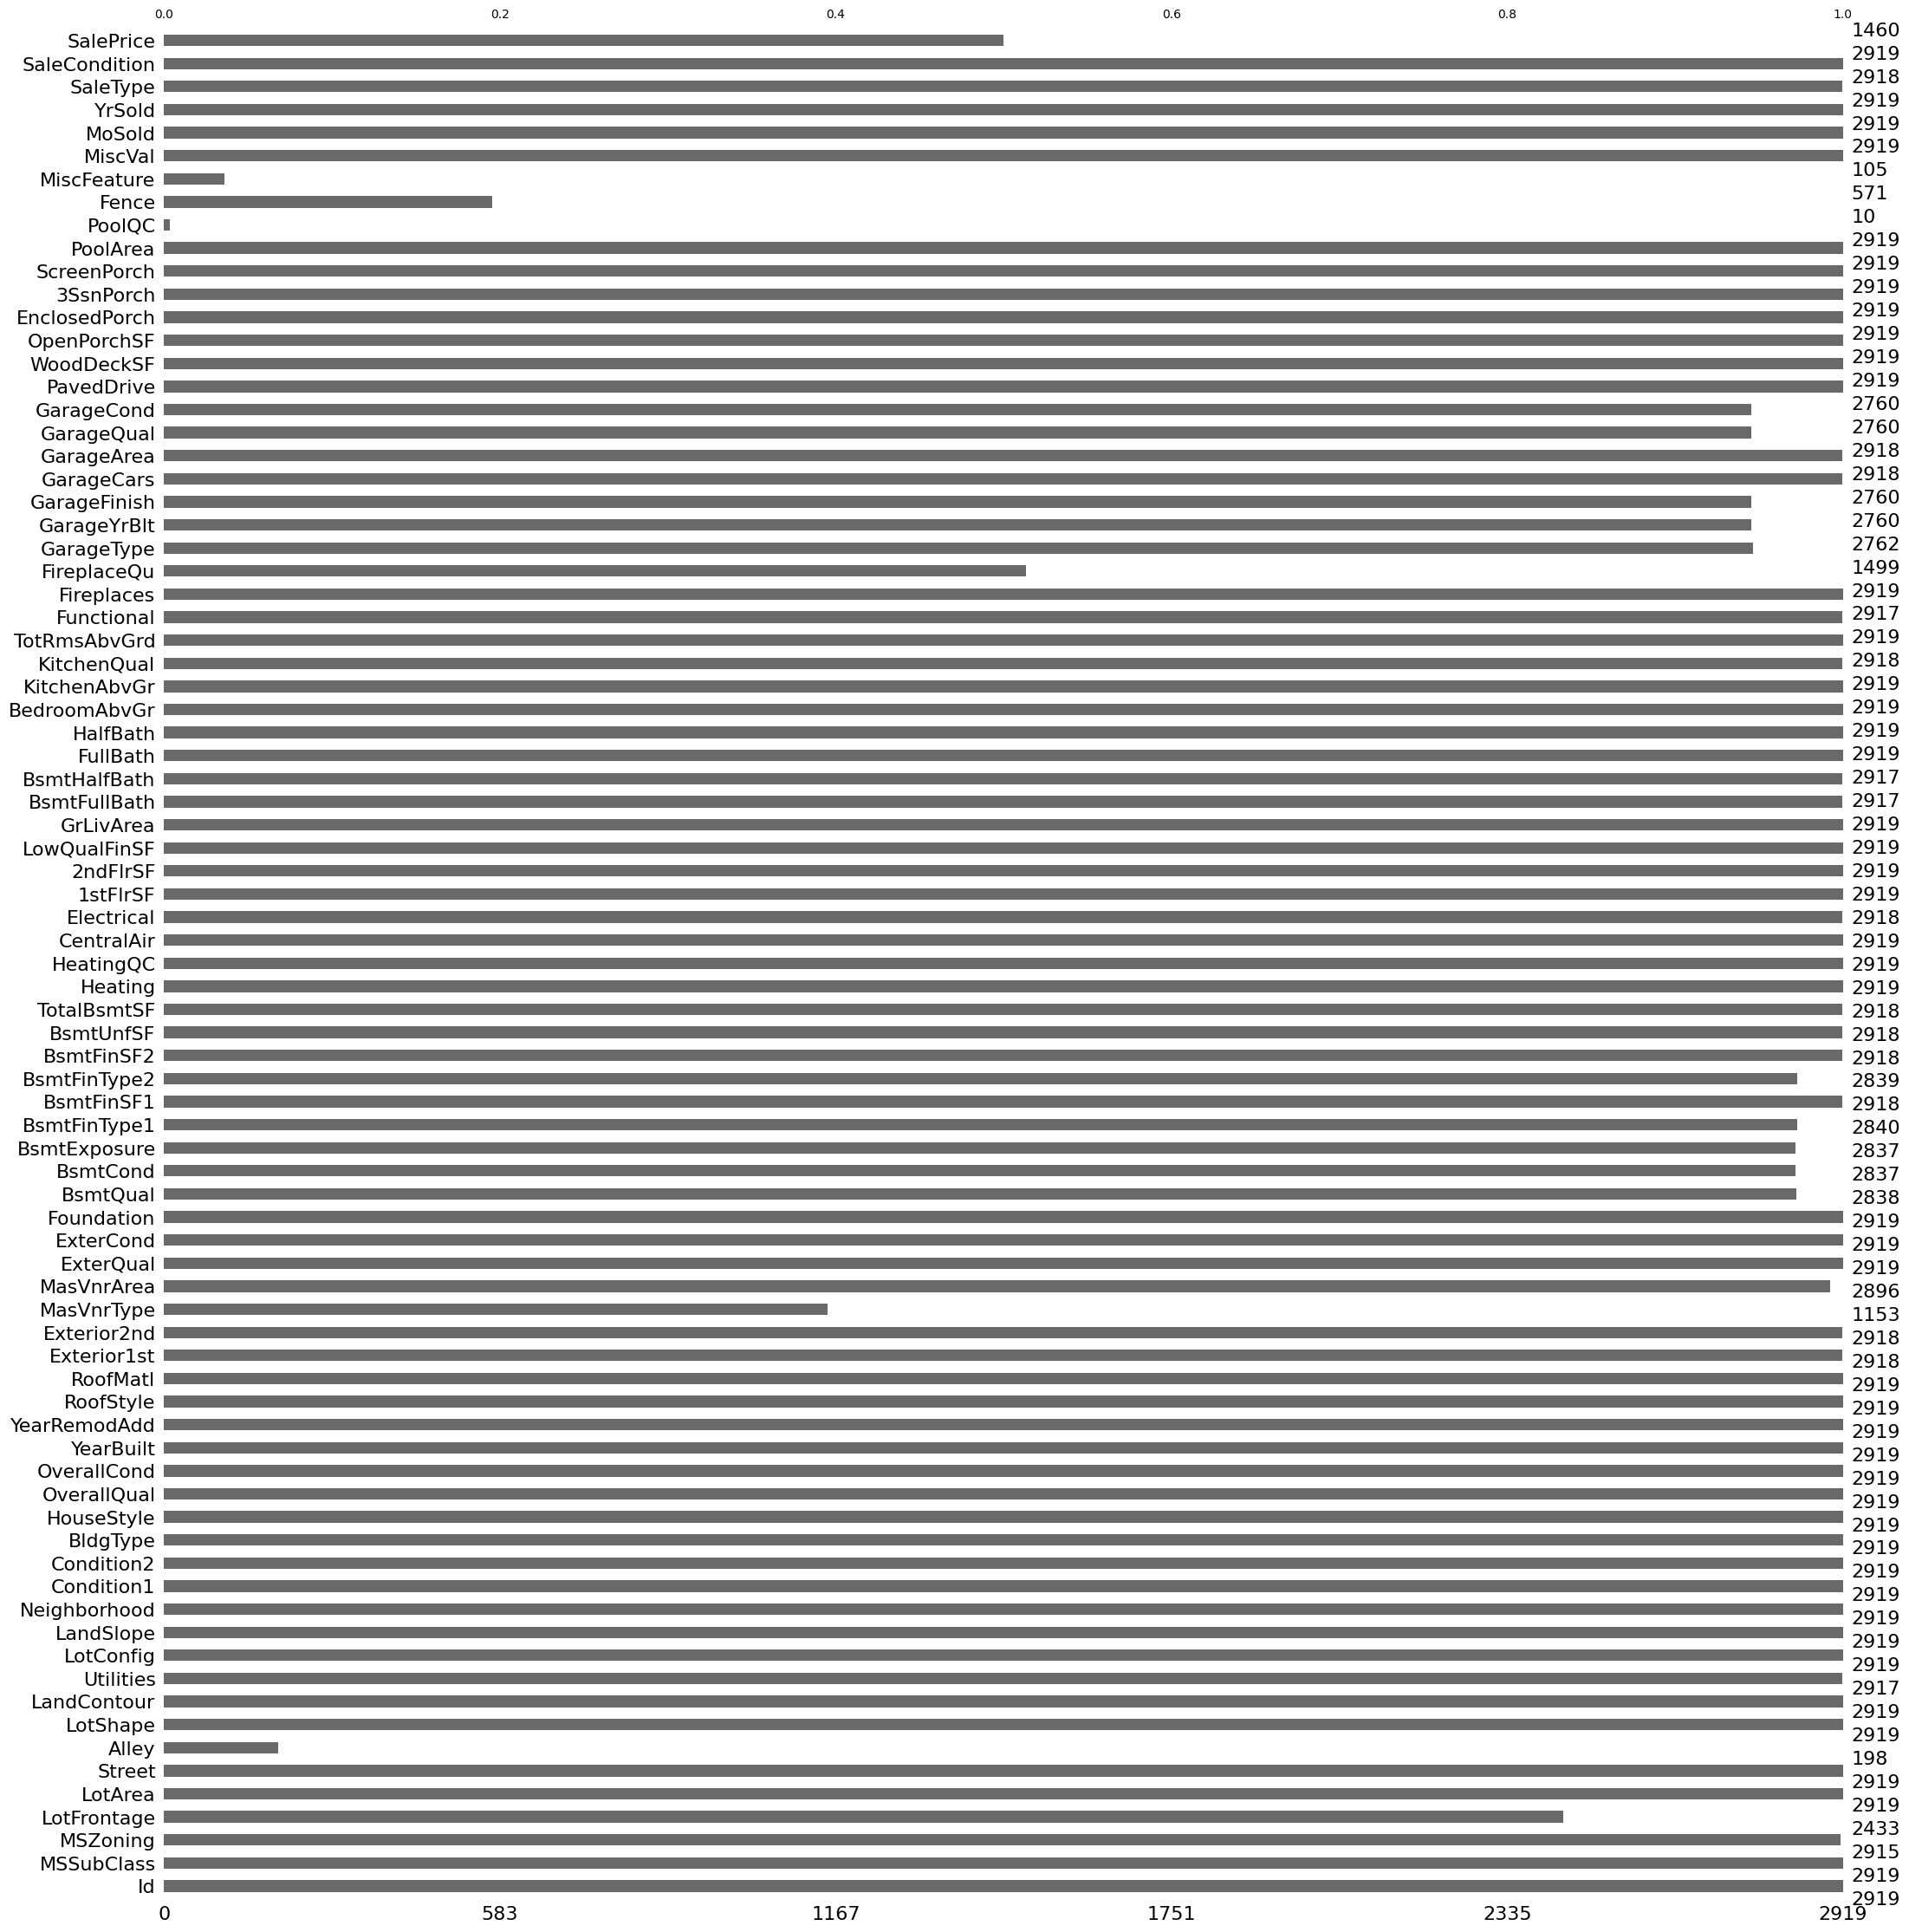

In [12]:
import missingno as msno

msno.bar(df)

In [13]:
print(df['PoolQC'].shape)
print(df['PoolQC'].isnull().sum())
print(df['PoolQC'].unique())

(2919,)
2909
[nan 'Ex' 'Fa' 'Gd']


In [14]:
df.duplicated().sum()

0

In [15]:
# Dropping columns with large nan values

df=df.drop('PoolQC', axis=1)
df=df.drop(['MiscFeature','Fence','FireplaceQu', 'MasVnrType', 'Alley'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [18]:
X = df.iloc[:,:-1]
X.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal


In [19]:
y = df.iloc[:,-1]
y.head(2)

0    208500.0
1    181500.0
Name: SalePrice, dtype: float64

In [20]:
# impute most frequent value for categorical column

for col in X.columns:
    if df[col].isnull().sum()>0 and df[col].dtype=='O':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
# Impute with median for numerical columns

for col in X.columns:
    if df[col].isnull().sum()>0 and df[col].dtype!='O':
        df[col].fillna(df[col].median(), inplace=True)

<Axes: >

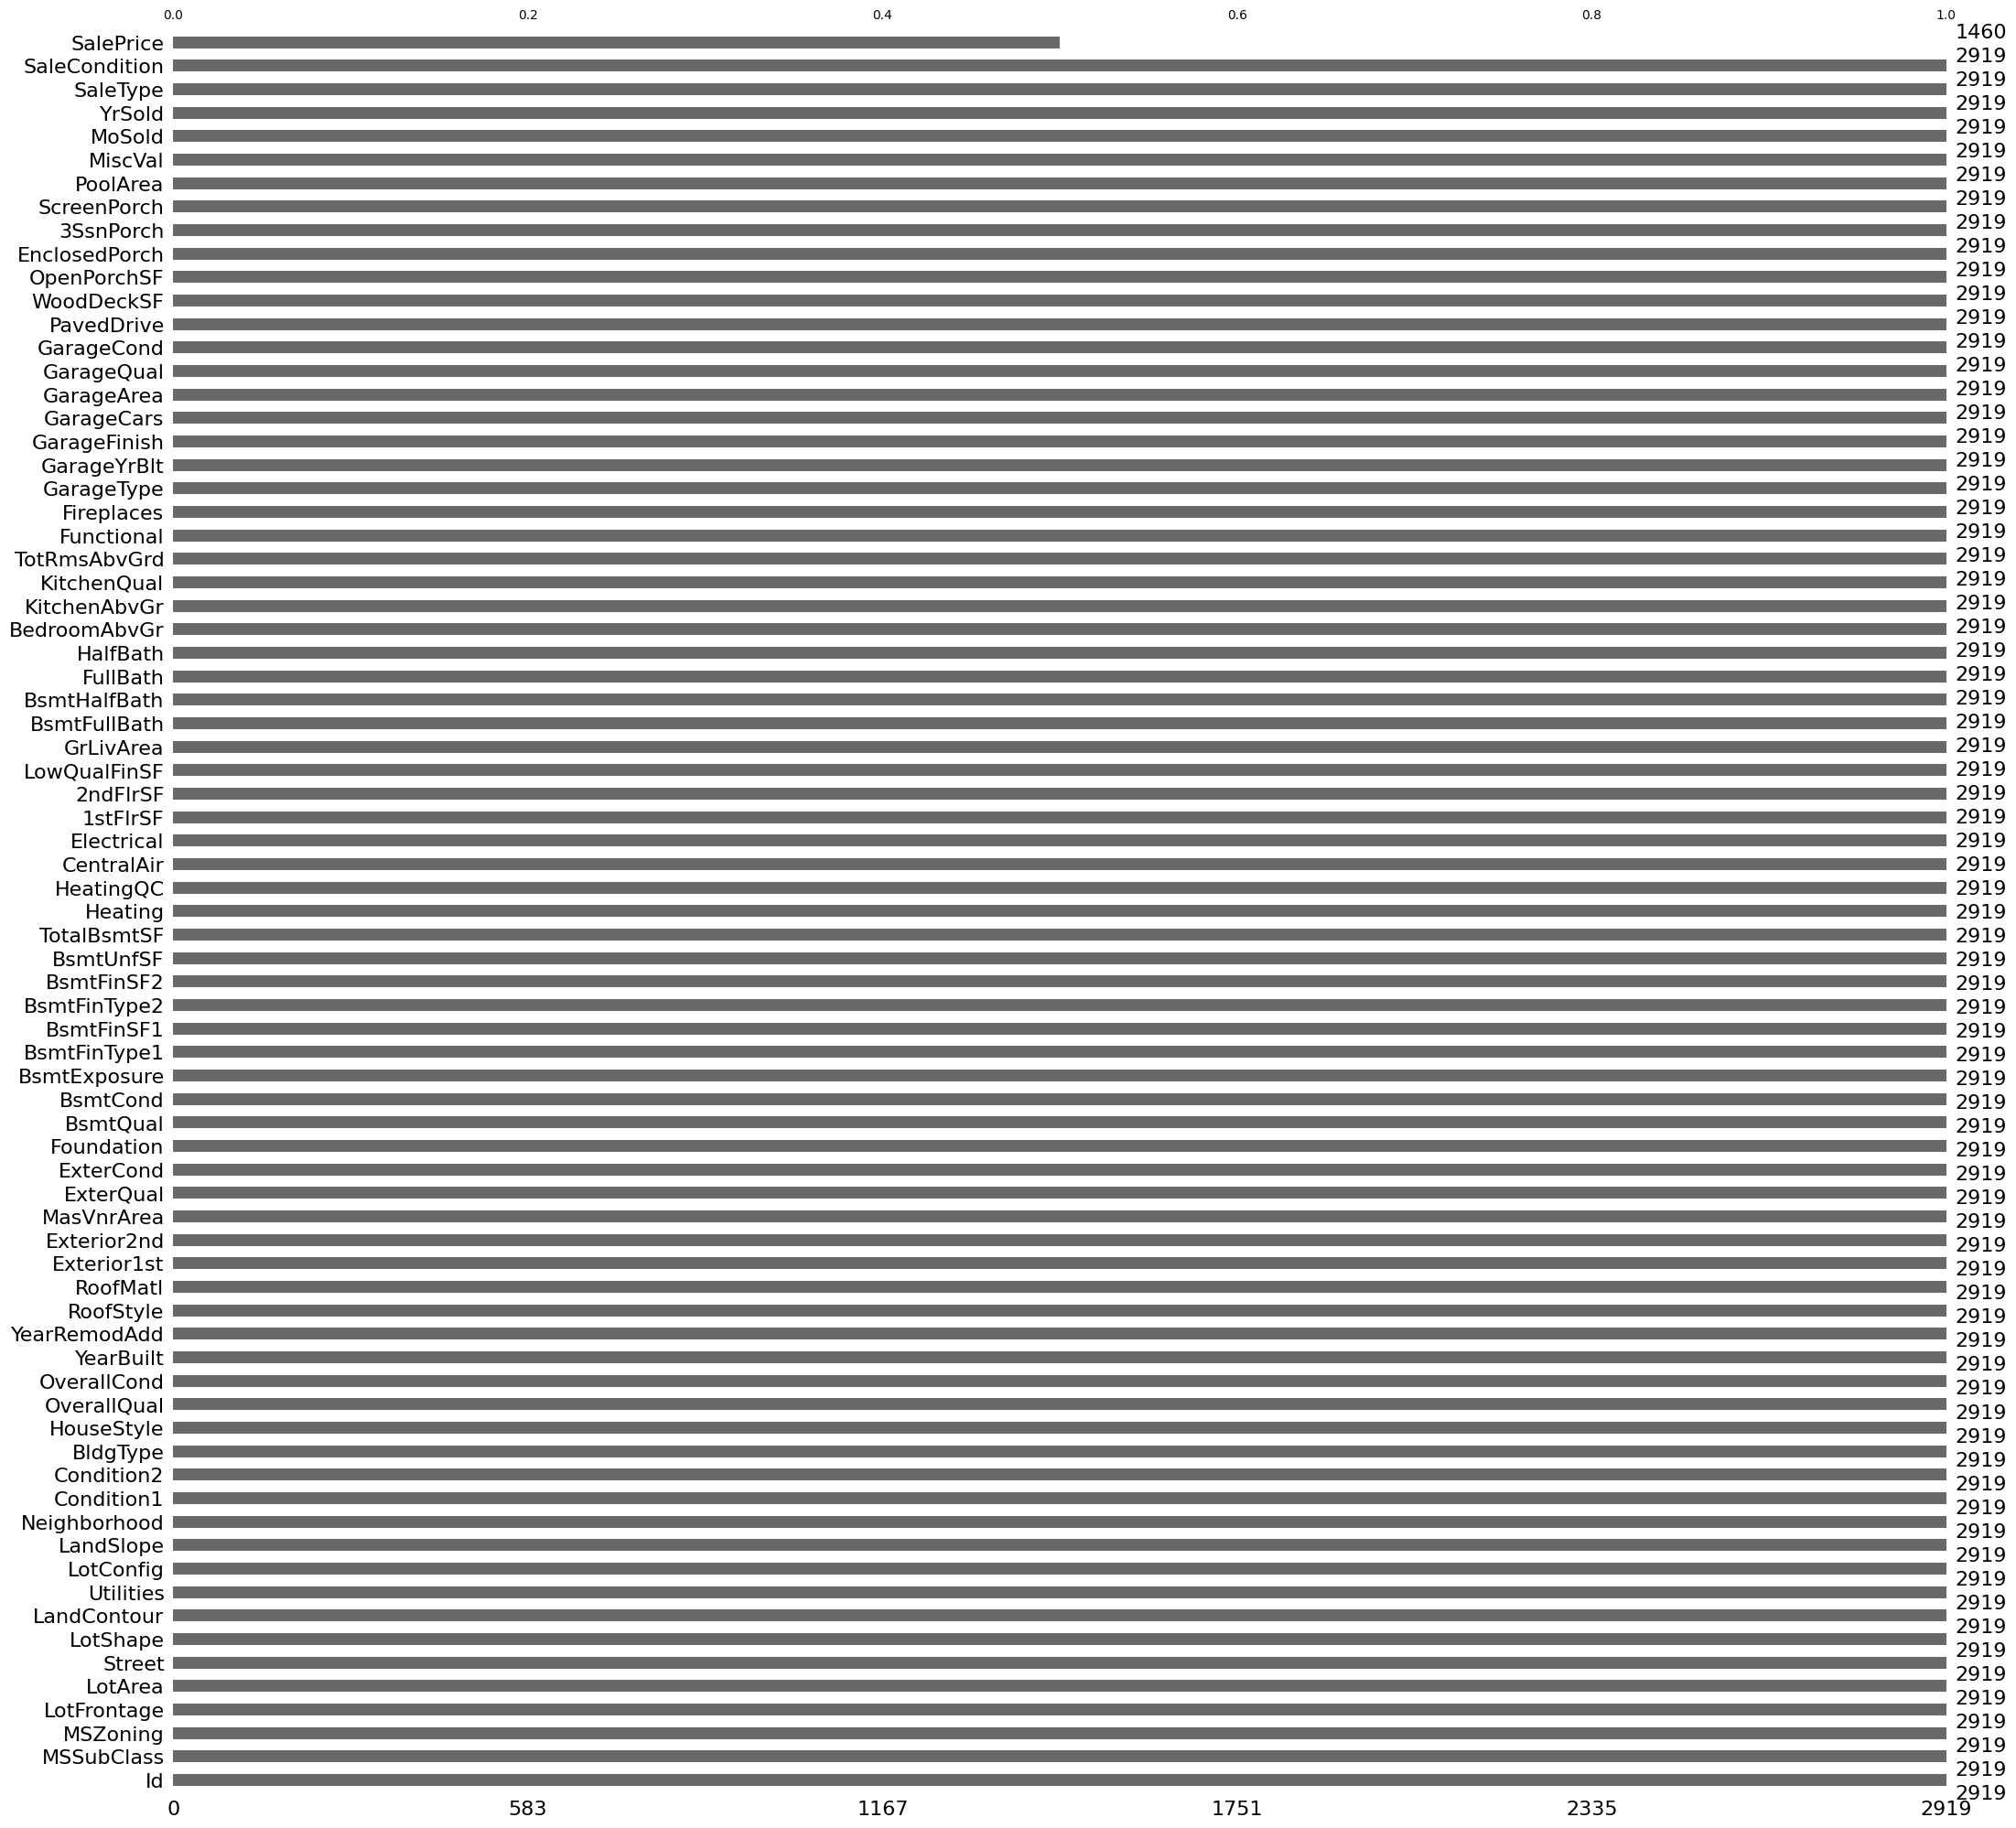

In [22]:
msno.bar(df)

In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.088386,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.398253,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.317898,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.534750,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [24]:
# Data Visualization

<Axes: >

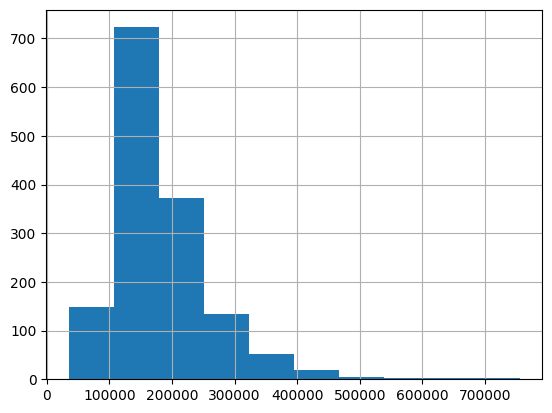

In [25]:
# For numerical features

df['SalePrice'].hist()

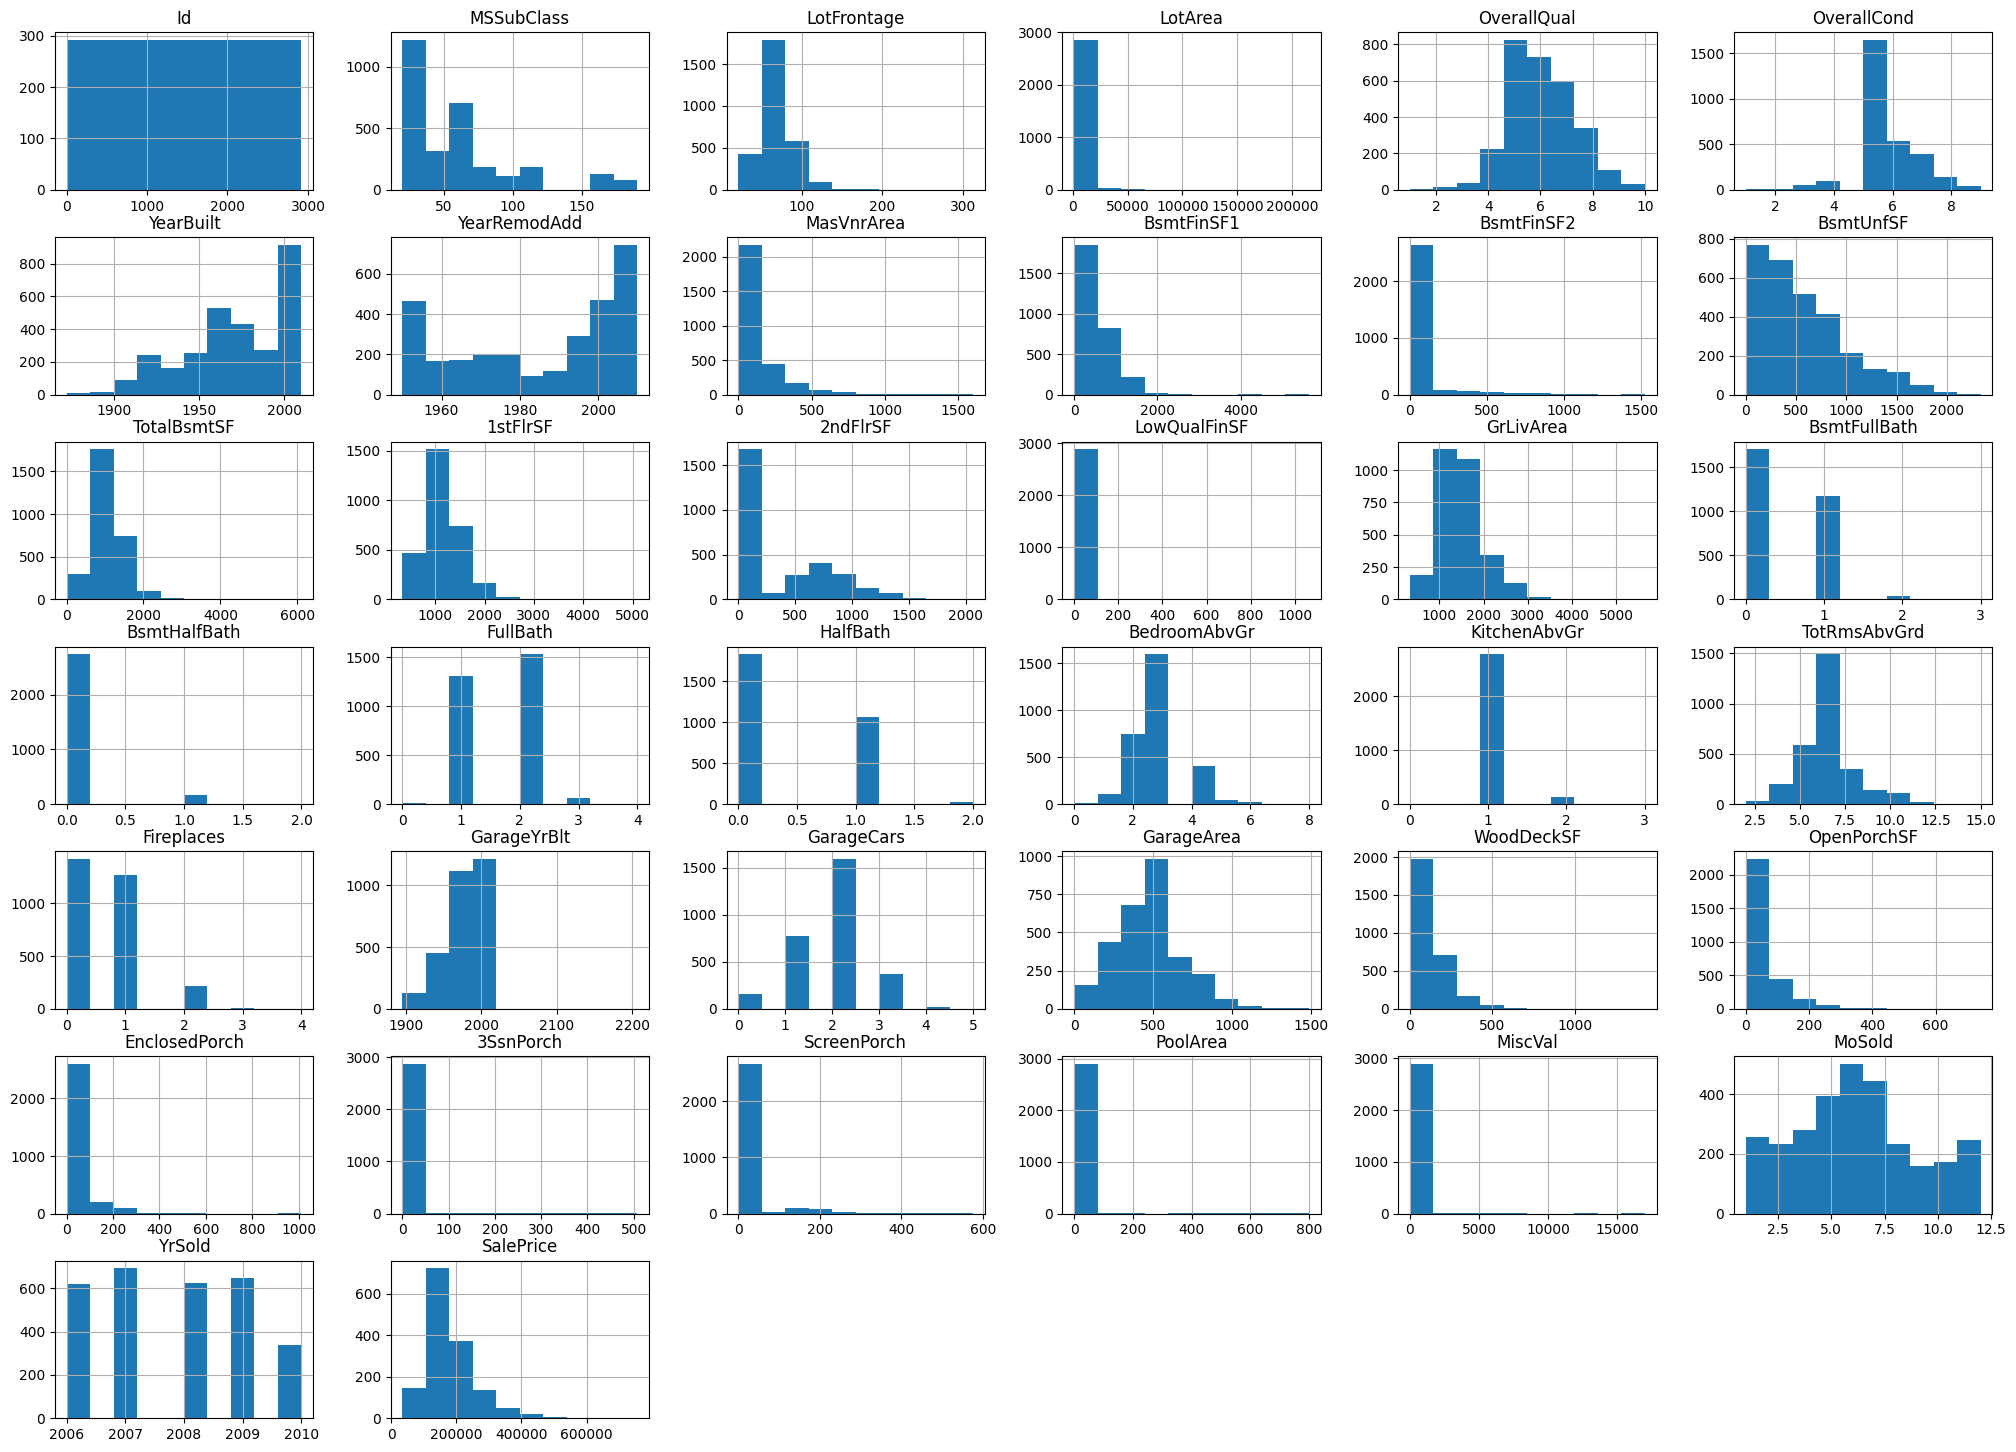

In [26]:
df.hist(figsize=(25,18))
plt.tight_layout
plt.show()

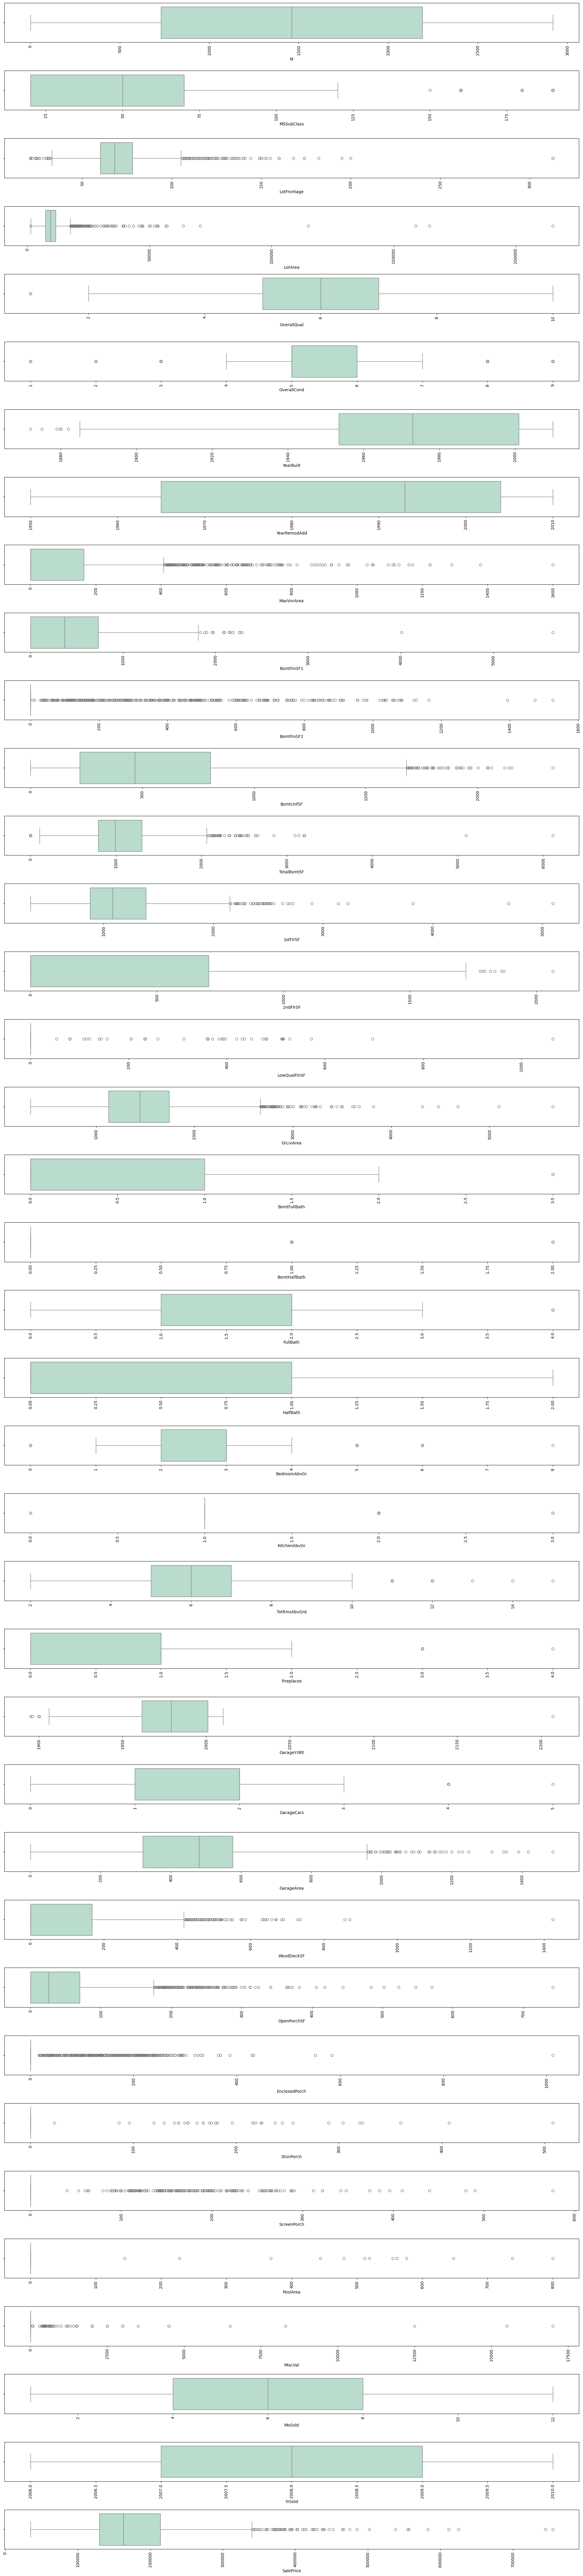

In [27]:
plt.figure(figsize=(20,88))

for i, col in enumerate(df.select_dtypes(include=['int','float']).columns):
    plt.subplot(len(df.select_dtypes(include=['int','float']).columns),1,i+1)
    sns.boxplot(data=df,x=col,orient='h',palette='Pastel2')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# # plt.figure(figsize=(30,28))
# # sns.boxplot(data=X,palette='Pastel1',linewidth=0.2, orient='h')
# # plt.show()

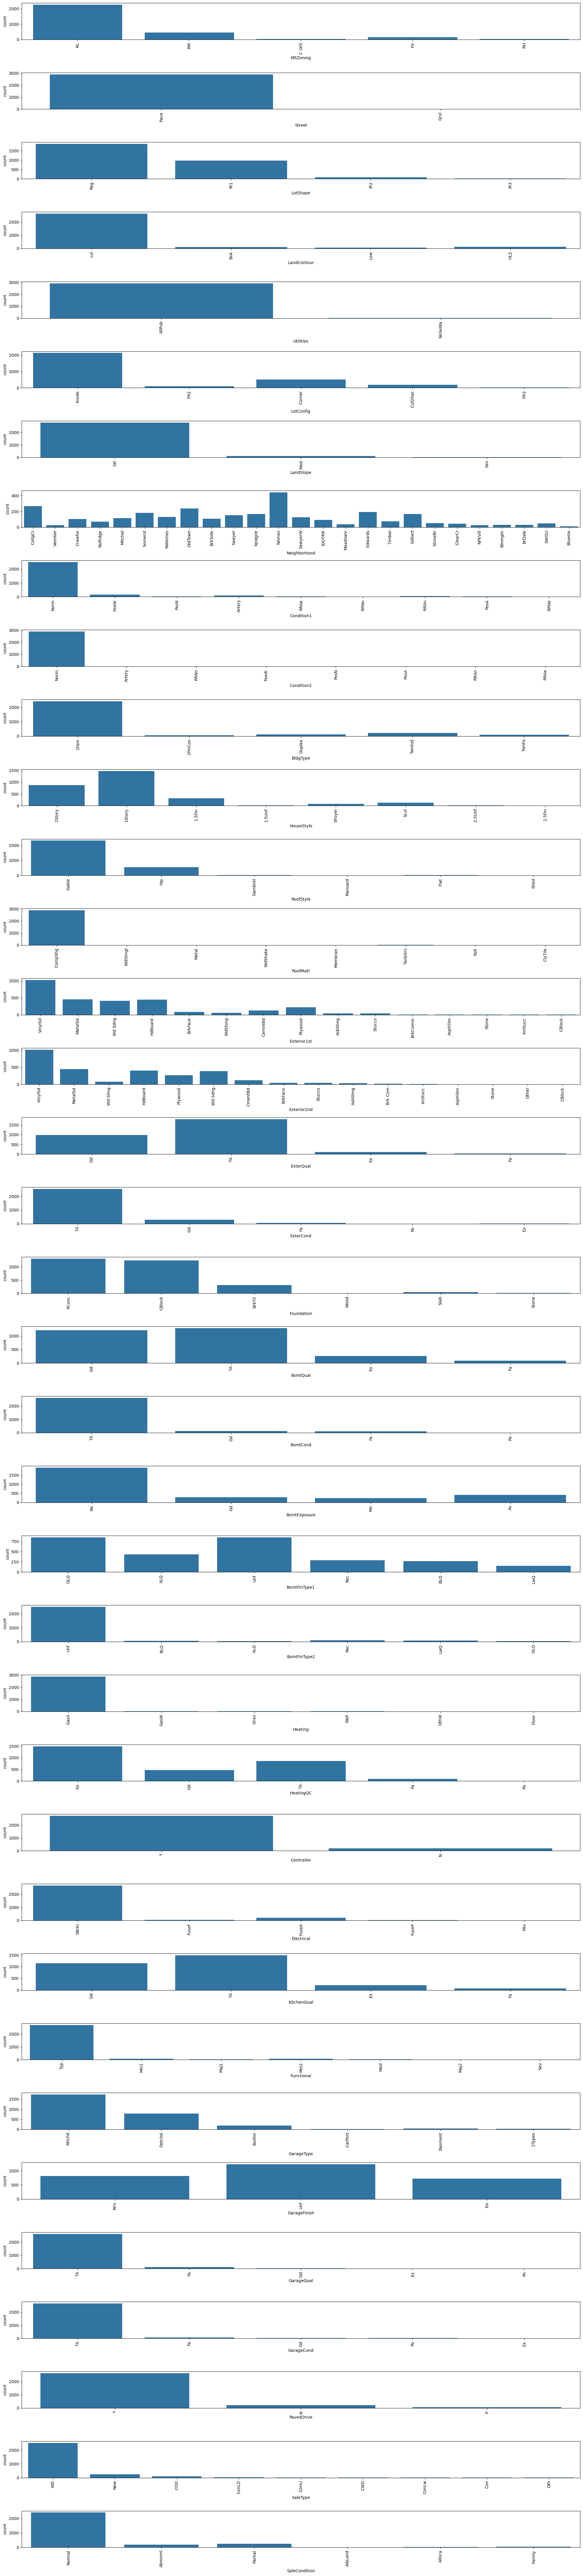

In [28]:
# For categorical Features

plt.figure(figsize=(20,88))

for i, col in enumerate(df.select_dtypes(include='object').columns):
    plt.subplot(len(df.select_dtypes(include='object').columns),1,i+1)
    sns.countplot(data=X, x=col)
    plt.xticks(rotation=90)  #Rotate X axis labels if needed

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

print(categorical_columns)
print('='*90)
print(numerical_columns)

for col in categorical_columns:
    df[col]=encoder.fit_transform(df[col])   

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars

In [30]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0


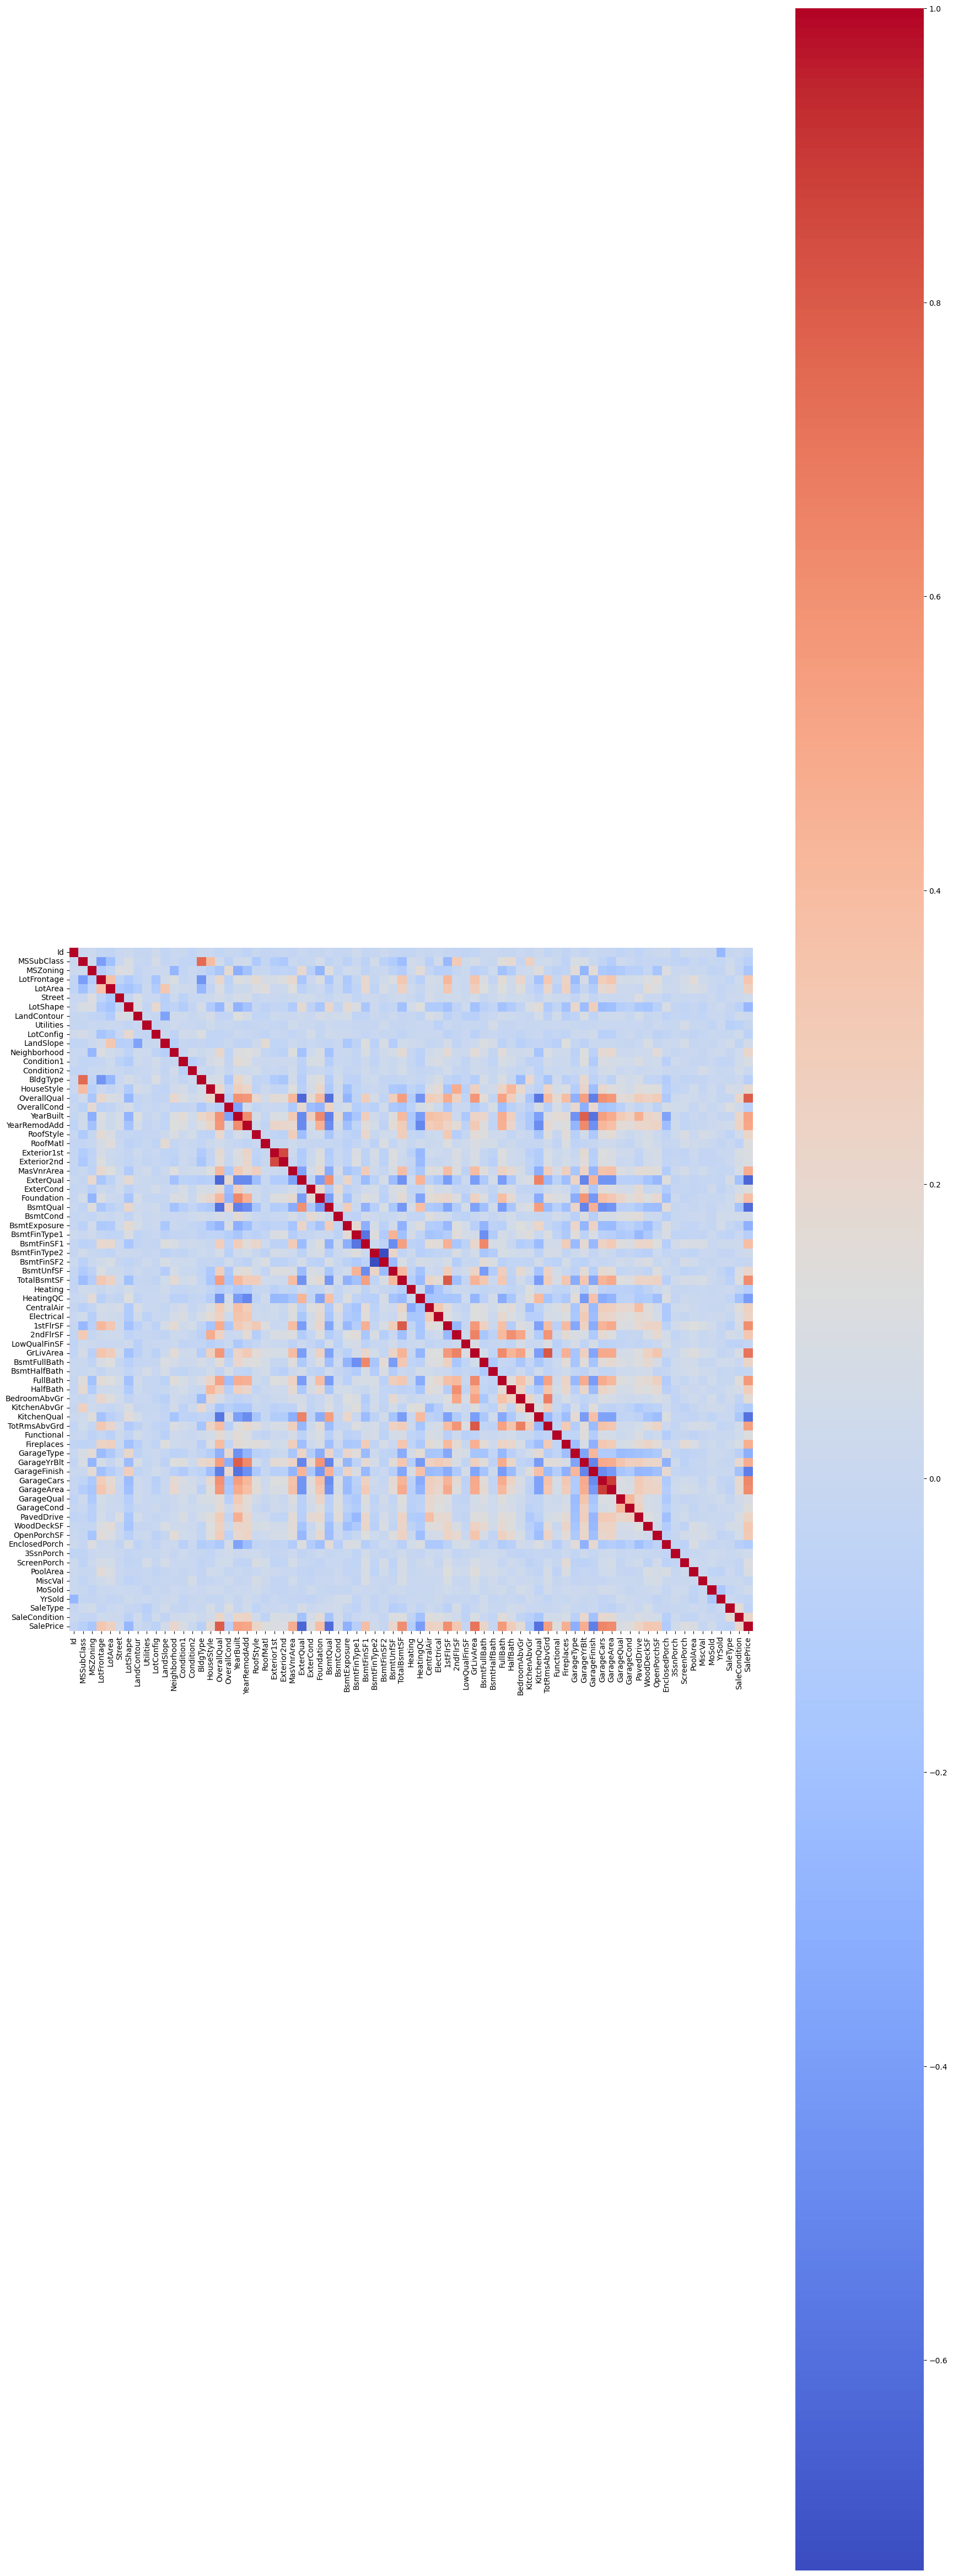

In [31]:
# Correlation Matrix

corr_matrix = df.corr()

plt.figure(figsize=(20,80))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm',fmt='.2g',square=True)
plt.tight_layout
plt.show()

In [32]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [33]:
# Trying to find highly correlated pairs

# threshold = 0.8

# high_corr = (corr_matrix.abs()>threshold) and (corr_matrix != 1)
# high_corr_pair = high_corr.stack()
# high_corr_pair = high_corr_pair[high_corr_pair]

# print("Highly Correlated Feature pair")
# print(high_corr_pair)



# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)  # Choose number of components to keep
# X_pca = pca.fit_transform(X)
# X_pca

In [34]:
# # preprocessing the data

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)


In [35]:
# X_scaled

In [36]:
# y

In [37]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# target = 'num_sold'
# train_df.drop('id', axis=1, inplace=True)
# X = train_df.drop(target, axis=1)
# y = train_df[target]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# model.fit(X_train, y_train)

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,0,0,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,0,0,700,7,2006,8,4,NaN


In [111]:
# Rows with NaN values in target (for y_test)
y_test = df[df['SalePrice'].isna()]
X_test = y_test.drop(columns=['SalePrice'])  # Features of rows with NaN in target

# Rows with non-NaN values in target (for y_train)
y_train = df.dropna(subset=['SalePrice'])
X_train = y_train.drop(columns=['SalePrice'])  # Features of rows with non-NaN in target


# Displaying the sizes to verify
print("X Train set features:", X_train.shape)
print("X Test set features:", X_test.shape)
print("Y Train set features:", y_train.shape)
print("Y Test set features:", y_test.shape)


X Train set features: (1460, 74)
X Test set features: (1459, 74)
Y Train set features: (1460, 75)
Y Test set features: (1459, 75)


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [107]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('Log_reg', LogisticRegression())
])

In [108]:
pipeline.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (1460, 75) instead.

In [109]:
y_pred = pipeline.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [110]:
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error : {mse}")

ValueError: Input contains NaN.

In [86]:
y_test

1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
        ..
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1459, dtype: float64